# Aufgabe 1: Lineare Regression und co.

> An verschiedene Stellen $x_i$ eines horizontalen Balken von Länge
> $L=7m$ wurde die Durchbiegung $y_i$ gemessen:
> ![Werte und Plot](./assets/s01_aufg1.png)

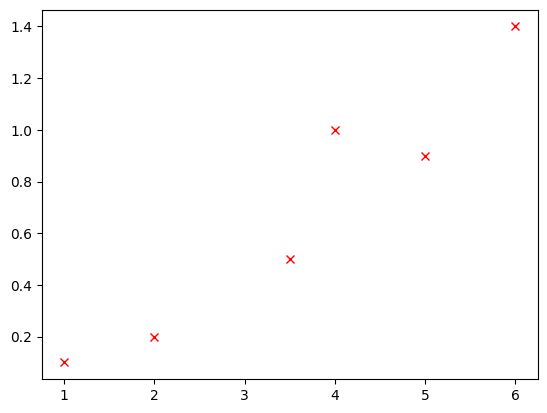

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.0, 2.0, 3.5, 4.0, 5.0, 6.0])
y = np.array([0.1, 0.2, 0.5, 1.0, 0.9, 1.4])

plt.plot(x, y, 'rx')
plt.show()

## Linearer Zusammenhang

> Kann bei den Daten von einem näherungsweise linearem Zusammenhang ausgegangen
> werden? Berechnen Sie zur Untermauerung Ihrer Antwort die empirische Kovarianz
> sowie den empirischen Korrelationskoeffizienten (nach Braivais-Pearson).

- empirische Varianz $\displaystyle \tilde{s}_x^2 =
    \frac1n \sum_{j=1}^n (x_j - \overline{x})^2$
- empirische Standardabweichung $\displaystyle \tilde{s}_x
    = \sqrt{\tilde{s}_x^2}$
- empirische Kovarianz $\displaystyle \tilde{s}_{x,y} = \frac1n
    \sum_{j=1}^n (x_j - \overline{x}) (y_j - \overline{y})$
- empirischer Korrelationskoeffizient $\displaystyle r_{x,y} =
    \frac{\tilde{s}_{x,y}}{\tilde{s}_x \tilde{s}_y} \in [-1,1]$

$\Rightarrow$  linearer Zusammenhang $\Leftrightarrow$ $r_{x,y} \approx 1$

In [7]:
n = len(x)

# arithmetisches Mittel
x_mean = np.mean(x)
y_mean = np.mean(y)

print('x_mean = ', x_mean)
print('y_mean = ', y_mean)

x_mean =  3.5833333333333335
y_mean =  0.6833333333333332


In [21]:
# Varianz
# s2_x = np.sum(x ** 2) / n - x_mean ** 2
# s2_y = np.sum(y ** 2) / n - y_mean ** 2
s2_x = np.var(x)
s2_y = np.var(y)

print(f's2_x = {s2_x:.4f}')
print(f's2_y = {s2_y:.4f}')

# Standardabweichung
# s_x = np.std(x)
# s_y = np.std(y)
s_x = np.sqrt(s2_x)
s_y = np.sqrt(s2_y)

print(f's_x = {s_x:.4f}')
print(f's_y = {s_y:.4f}')

s2_x = 2.8681
s2_y = 0.2114
s_x = 1.6935
s_y = 0.4598


In [19]:
# Kovarianz
s_xy = np.sum(x * y) / n - x_mean * y_mean
print(f's_xy = {s_xy:.4f}')

s_xy = 0.7431


In [23]:
# Korrelationskoeffizient
r_xy = s_xy / (s_x * s_y)
print(f'r_xy = {r_xy:.4f}')

r_xy = 0.9543


$r_{x,y} \approx 1 \Rightarrow$ annähernd linearer Zusammenhang

## Regressionsgerade

> Berechnen Sie eine Regressionsgerade $g(x) = wx +b$ und prognostizieren Sie
> damit die Durchbiegung am Endpunkt des Balkens.

$$
w = \frac{\tilde{s}_{x,y}}{\tilde{s}_x^2} \newline
b = \vec{y} - w \cdot \vec{x}
$$

In [25]:
w = s_xy / s2_x
b = y_mean - w * x_mean

print('w =', w)
print('b =', b)

W = np.empty((2, 1))
W[0] = w
W[1] = b

w = 0.2590799031476997
b = -0.24503631961259065


In [26]:
# mit eingebauten Routinen
# Achtung: einheitlich Stichproben / empirisch verwenden!
print(np.cov(x, y)[0,1])
print(np.var(x, ddof=1))
print('w =', np.cov(x, y)[0,1] / np.var(x, ddof=1))

0.8916666666666668
3.4416666666666673
w = 0.25907990314769974


In [31]:
def g(x):
    return w * x + b

endpunkt = 7
print(f'g({endpunkt}) = {g(endpunkt):.4f}')

g(7) = 1.5685


## Regression als Minimierung

> Diese Regressionsaufgabe lässt sich auch als Minimierungsaufgabe
> $$f(w,b) = \sum_{j=1}^n (y_j - g(x_j))^2 \to \min$$
> lösen. Zeigen Sie, dass dies genau die bekannten Formeln aus der Statistik
> ergibt. Schreiben Sie $f$ in der Form $||\mathbf{y} - \mathbf{Aw}||_2^2$.

In [37]:
# Ausgleichsmatrix
A = np.stack([x, np.ones(n)]).T

# Kleinste-Quadrate-Lösung
W = np.linalg.lstsq(A, y, rcond=None)[0]
w = W[0]
b = W[1]

print('W =', W)
print('w =', w)
print('b =', b)

W = [ 0.2590799  -0.24503632]
w = 0.25907990314769985
b = -0.24503631961259112


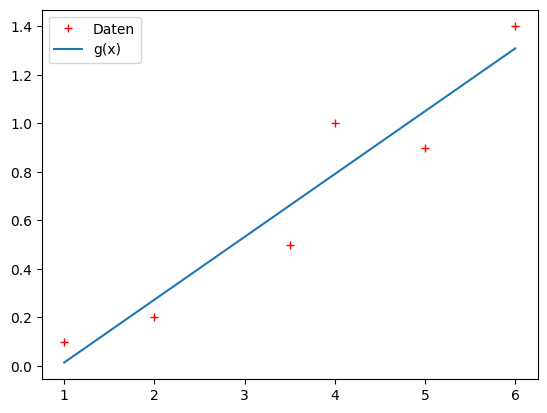

In [38]:
plt.plot(x, y, 'r+', label='Daten')
plt.plot(x, w * x + b, label='g(x)')
plt.legend()
plt.show()

## Erweiterung kubisch

> Wie muss man Teil **(b)** erweitern, um ein kubisches Modell
> $g(x) = w_1x + w_2x^2 + w_3x^3 + b$ zu verwenden?

W = [-0.01394558  0.06768707 -0.0047619   0.03265306]


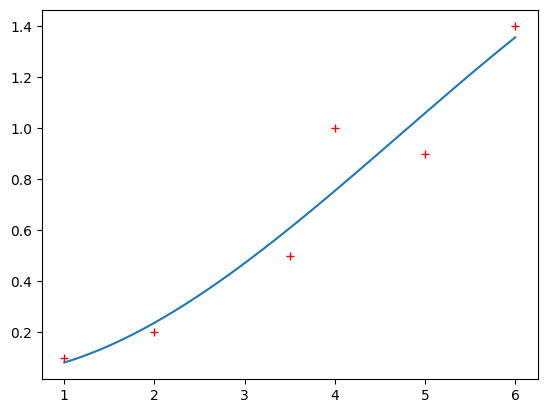

In [41]:
# neue Ausgleichsmatrix
A_kubisch = np.vstack([x, x ** 2, x ** 3, np.ones(n)]).T

W_kubisch = np.linalg.lstsq(A_kubisch, y, rcond=None)[0]
print('W =', W_kubisch)

x_plot = np.linspace(1, 6, 100)

plt.plot(x, y, 'r+', label='Daten')
plt.plot(x_plot, W_kubisch[0] * x_plot + W_kubisch[1] * x_plot ** 2 + W_kubisch[2] * x_plot ** 3 + W_kubisch[3], label='kub')
plt.show()